In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import glob

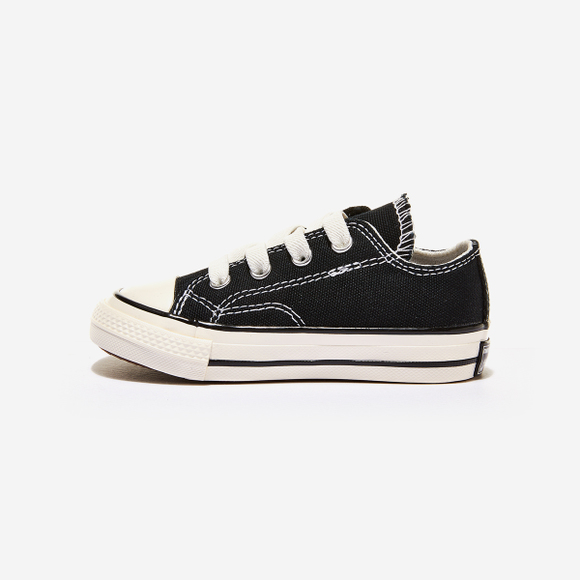

In [49]:
converse4 = Image.open("../ML_ImageData/converse4.jpeg").convert("RGBA")
converse4

(128, 128, 4)


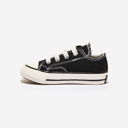

In [51]:
image = converse4.resize((128,128))
converse4 = Image.new("RGBA",image.size)
converse4.paste(image, mask=image)
converse4.convert("RGB").save("../DL_Project/converse4_jpg.jpg")
print(np.array(converse4).shape)
converse4

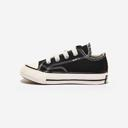

In [52]:
converse4 = Image.open("../DL_Project/converse4_jpg.jpg")
converse4

(128, 128, 3)


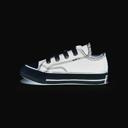

In [53]:
converse4_reversed = 255-(np.array(converse4))
img = Image.fromarray(converse4_reversed)
print(converse4_reversed.shape)
img

In [54]:
fileCount = 0
image_w = 128
image_h = 128

for angle in range(-30, 30, 1):
    # 회전 데이터 추가
    img_rotated = img.rotate(angle)
    img_rotated.save("../ML_ImageData/converse4_base/converse4_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1
    # 반전 데이터 추가
    # img_fliped = converse1.transpose(Image.FLIP_LEFT_RIGHT)
    # img_fliped.save("./Data/Converse_1/converse_1_%03d.jpg"%(fileCount),"JPEG")
    # fileCount += 1

In [55]:
width = 128
height = 128
count = 60
channel = 3

train = np.zeros(count*height*width*channel,dtype=np.int32).reshape(count,height,width,channel)
i = 0
for file in sorted(glob.glob("../ML_ImageData/converse4_base/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    train[i,:,:,:] = img
    i+=1

In [56]:
train.shape

(60, 128, 128, 3)

In [57]:
train = train.reshape(-1,height*width*channel)
df = pd.DataFrame(train)
print(len(df))
df.head()

60


,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.to_csv("./Data/converse4.csv",index=False)

In [59]:
df_converse4 = pd.read_csv("./Data/converse4.csv")

In [60]:
df_converse4

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
